In [1]:
import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
import pandas as pd

### Check imaging data

In [2]:
sumPath = '/Users/zhengj10/Desktop/GENIE/Data/PatcherBot/summary'
imgPath = '/Volumes/Backup Plus/patch-screen/bot'

In [2]:
# imgFile = '/Volumes/genie/BenArthur/patch-screen/bot/2020.08.20_000/plate_001/patch_attempt_0008_000/006.mat'
# os.path.exists(imgFile)


True

In [5]:
df = pd.read_pickle(sumPath+'/Summary_VC_all.pkl')
df_p = pd.read_pickle(sumPath+'/Plot_Voltron_single_mutants.pkl')


In [7]:
# df_p = df[df.Mutation == '558.1']
df_p = df_p[df_p['Mutation'].isin(['421.1','421.3028'])]
# sensors = ['421.1','421.3028']

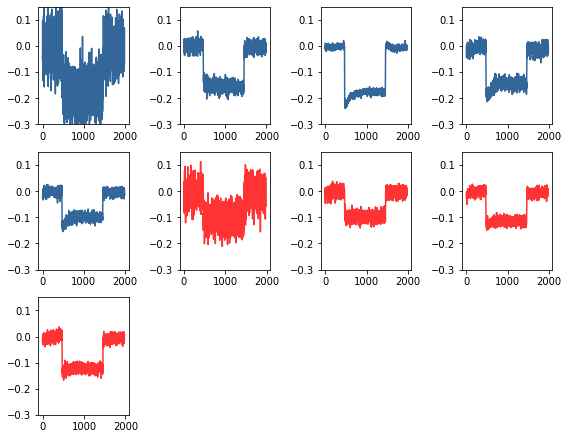

In [21]:
fig = plt.figure(figsize=[8,10])
s = 1
for i,r in df_p.iterrows():
    imgFile = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'006.mat')
    f= h5py.File(imgFile,'r')
    d = f['params']['fit_pix_double']
    st = d[0]
    obj = f[st]
    trace = obj['bleach_bkg_norm_ave_trace'][()]
    ax = plt.subplot(5,4,s)
    if r['Mutation']=='421.1':
        ax.plot(trace,color='#336699')
    elif r['Mutation']=='421.3028':
        ax.plot(trace,color='#FF3333')
    plt.ylim([-0.3,0.15])
    s+=1
plt.tight_layout()
fig.savefig('/Users/zhengj10/Desktop/Voltron 2 paper_v4/421.1_vs_421.3028.png')

In [3]:
f= h5py.File(imgFile,'r')
d = f['params']['fit_pix_double']

In [4]:
len(d)

1

In [5]:
st = d[0]
obj = f[st]

In [6]:
trace = obj['bleach_bkg_norm_ave_trace'][()]

In [15]:
import seaborn as sns
sns.set()
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=[5,7])
plt.plot(trace)
plt.ylim([-0.32,0.05])
# fig.savefig('/Users/zhengj10/Desktop/200826/voltron-A122D_40x_oil.png',dpi=1200)
plt.show()


In [ ]:
# imgFile = '/Volumes/genie/BenArthur/patch-screen/bot/2020.06.25_000/plate_008/patch_attempt_0043_000/006.mat'
os.path.exists(imgFile)

In [ ]:
f= h5py.File(imgFile,'r')
d = data['params']['fit_pix_double']
st = d[0]
obj = f[st]
trace = obj['bleach_bkg_norm_ave_trace'][()]
fig = plt.figure(figsize=[5,7])
plt.plot(trace)
plt.ylim([-0.22,0.05])
plt.show()


In [ ]:
dff_all = []
for plate in platePath:
    for cell in cellPath:
        if not os.path.exists(os.path.join(imgPath,plate,cell,'camera_clamp1_000')):
            continue
        dff_list = []
        print(cell)
        for trial in range(4):

            dataFile = imgPath +  '/' + plate + '/' + cell + '/camera_clamp1_000/' + str(trial).zfill(3) + '/Camera/frames.ma'

            data = h5py.File(dataFile,'r')
            imgData = data['data'][()]
            dff_single = get_dff(imgData)
            dff_list.append(dff_single)


In [ ]:
imgData.shape

In [ ]:
plt.plot(dff_list)
plt.show()

In [ ]:
fig = plt.figure()
dff_all_mean = np.mean(dff_all, axis=0)
# dff_all_sem = np.std(dff_all, axis = 0)/(len(dff_all)-1)
# dff_all_sem = np.zeros(9)
# x = np.linspace(-100,40,9)

dff_all_sem = np.zeros(4)
x = np.linspace(-100,-40,4)


plt.errorbar(x, dff_all_mean, yerr=dff_all_sem, fmt='o-', markersize='8', lw=2)
# fig.savefig('/Users/zhengj10/Desktop/414.1.png')
plt.show()


In [ ]:
# dff_all_sensor={}

In [ ]:
dff_all_sensor['414.1'] = dff_all_mean

In [ ]:
dff_all_sensor

In [ ]:
fig = plt.figure(figsize=[8,8])
# colormap = {'376.1':'#1f77b4', '376.13': '#ff7f0e', '414.1': '#2ca02c'}
for sensor in['376.1','376.13','414.1']:
    dff_all_mean = dff_all_sensor[sensor]
    dff_all_sem = np.std(dff_all, axis = 0)/(len(dff_all)-1)
    x = np.linspace(-100,40,9)
    plt.errorbar(x, dff_all_mean, yerr=dff_all_sem, fmt='o-', markersize='8', lw=2, label=sensor)
    plt.legend()
fig.savefig('/Users/zhengj10/Desktop/SfN/PatcherBot.pdf', dpi=1200)
plt.show()


In [ ]:
x = data['info']['0']['values']


### Check meta data

In [ ]:
# dataFile = '/Users/zhengj10/Desktop/0925_376.1/patch_attempt_0000_000/camera_clamp2_000/000/Clamp2.ma' # I and V steps
# dataFile = '/Users/zhengj10/Desktop/0925_376.1/patch_attempt_0000_000/camera_clamp2_000/000/LEDChannels.ma'
# dataFile = '/Users/zhengj10/Desktop/daqResult.ma'
dataFile = '/Users/zhengj10/Desktop/Clamp1.ma'

In [ ]:
data = h5py.File(dataFile)
meta = data['data'][()]


In [ ]:
meta.shape


In [ ]:
fig = plt.figure(figsize=[10,12])
for ch in range(meta.shape[0]):
    ax = fig.add_subplot(3,1,ch+1)
    ax.plot(meta[ch,:])
#     ax.set_xlim([550,700])

plt.show()
# fig.savefig('/Users/zhengj10/Desktop/Clamp2.ma.data.2.png')


In [ ]:
data.keys()

In [ ]:
plt.plot(imgData[2,:])
plt.show()


### Get tiff sequences for specified voltage step

In [ ]:
# dataFile = '/Users/zhengj10/Desktop/0925_376.1/patch_attempt_0000_000/camera_clamp2_000/008/Camera/frames.ma'
dataFile = '/Users/zhengj10/Desktop/PatcherBot/2010.02.03_000/plate_000//patch_attempt_000_000/camera_clamp1_000/008/Camera/frames.ma'
# dataFile = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/patch_attempt_0035_000/camera_clamp2_000/008/Camera/frames.ma'


In [ ]:
data = h5py.File(dataFile)
imgData = data['data'][()]

In [ ]:
x = data['info']['0']['values'] # Frame time stamp


In [ ]:
dff_list = get_dff(imgData)

In [ ]:
plt.plot(x,dff_list, lw=0.3)
plt.show()


In [ ]:
# imsave('/Users/zhengj10/Desktop/test.tif', imgData)

In [ ]:
imgData.shape

### Save as one tif file (large size)

In [ ]:
entire_seq = np.zeros([2,508,41])
# imgPath = '/Users/zhengj10/Desktop/Data anlysis collection/PatcherBot/raw/2020.02.24_000/plate_000/patch_attempt_0013_000'
for trial in range(4):
#     dataFile = os.path.join(imgPath,'camera_clamp1_000',str(trial).zfill(3),'Camera','frames.ma')
    dataFile = os.path.join(imgPath,'plate_000/patch_attempt_0026_000/camera_clamp1_000',str(trial).zfill(3),'Camera','frames.ma')

#     dataFile = imgPath +  '/' + plate + '/' + cell + '/camera_clamp1_000/' + str(trial).zfill(3) + '/Camera/frames.ma'
#     dataFile = imgPath +  '/' + platePath[0] + '/' + cellPath[7] + '/camera_clamp2_000/' + str(trial).zfill(3) + '/Camera/frames.ma'
    data = h5py.File(dataFile,'r')
    imgData = data['data'][()]
    print(imgData.shape)
    entire_seq = np.concatenate((entire_seq, imgData), axis=0)

entire_seq = entire_seq[2:,:,:]
entire_seq.shape


In [ ]:
def roll_ave(imgFile):
    frames = []
    for frame in range(imgFile.shape[0]):

        if frame%10 == 0:
            ave_frame = np.mean(imgFile[frame:frame+4,:,:],axis=0)
            frames.append(ave_frame)
    frames = np.array(frames, dtype='float32')
    return frames
            
        

In [ ]:
newImg = roll_ave(entire_seq)

In [ ]:
newImg.shape

In [ ]:
imsave('/Users/zhengj10/Desktop/40x_oil.tif', entire_seq.astype('float32'))

In [ ]:
imsave('/Users/zhengj10/Desktop/roll_ave_421.1.tif', newImg.astype('float32'))

In [ ]:
mean_img = np.mean(entire_seq, axis=0)
mean_img.shape
np.max(mean_img)-np.min(mean_img)


In [ ]:
plt.figure(figsize=[16,10])
plt.imshow(mean_img, cmap='gray', vmax=1800)
plt.colorbar()
plt.show()


### Check meta in .index file

In [ ]:
import yaml

In [ ]:
a = yaml.load(open("/Users/zhengj10/Desktop/index"), Loader=yaml.FullLoader)
a


In [ ]:
def get_data(matFile):
    data = {}
    f = h5py.File(matFile)
#     d = f['params']['fit_pix_double'] # for double fit
#     amp_on_fast = []
#     amp_on_slow = []
#     amp_off_fast = []
#     amp_off_slow = []
#     tau_on_fast = []
#     tau_on_slow = []
#     tau_off_fast = []
#     tau_off_slow = []
#     time_on_fast = []
#     time_on_slow = []
#     time_off_fast = []
#     time_off_slow = []
    
    
#     def isNaN(num):
#         return num != num
#     for vStep in range(len(d)):
#         st = d[vStep]
#         obj = f[st]
#         if vStep == 0:
#             data['dff_corrected'] = obj['bleach_bkg_norm_ave_trace'][()]
#             if isNaN(data['dff_corrected'][0]):
#                 print ('No responsive pixels')
#         amp_on_fast.append(obj['bkg_norm_ave_onamp0'][()][0])
#         amp_on_slow.append(obj['bkg_norm_ave_onamp1'][()][0])
#         amp_off_fast.append(obj['bkg_norm_ave_offamp0'][()][0])
#         amp_off_slow.append(obj['bkg_norm_ave_offamp1'][()][0])
#         tau_on_fast.append(obj['bkg_norm_ave_ontime0'][()][0])
#         tau_on_slow.append(obj['bkg_norm_ave_ontime1'][()][0])
#         tau_off_fast.append(obj['bkg_norm_ave_offtime0'][()][0])
#         tau_off_slow.append(obj['bkg_norm_ave_offtime1'][()][0])
#     data['amp_on_fast'] = amp_on_fast
#     data['amp_on_slow'] = amp_on_slow
#     data['amp_off_fast'] = amp_off_fast
#     data['amp_off_slow'] = amp_off_slow
#     data['tau_on_fast'] = tau_on_fast
#     data['tau_on_slow'] = tau_on_slow
#     data['tau_off_fast'] = tau_off_fast
#     data['tau_off_slow'] = tau_off_slow
    
    
    d_single = f['params']['fit_pix_single']  # for single fit
    amp_on = []
    amp_off = []
    tau_on = []
    tau_off = []
    time_on = []
    time_off = []
#     tau_on_sigma = []
#     tau_off_sigma = []
    stim_frame_num = []
    for vStep in range(len(d_single)):
        st = d_single[vStep]
        obj = f[st]
        if vStep == 0:
            data['dff_corrected'] = obj['bleach_bkg_norm_ave_trace'][()]
            data['bleach'] = obj['bkg_norm_ave_bleach_parameters'][()][1]
            data['bleach_x'] = obj['bkg_norm_ave_bleach_parameters'][()][0]
        amp_on.append(obj['bkg_norm_ave_onamp'][()][0])
        amp_off.append(obj['bkg_norm_ave_offamp'][()][0])
        tau_on.append(obj['bkg_norm_ave_ontau'][()][0])
        tau_off.append(obj['bkg_norm_ave_offtau'][()][0])
        time_on.append(obj['bkg_norm_ave_ontime'][()][0])
        time_off.append(obj['bkg_norm_ave_offtime'][()][0])
#         tau_on_sigma.append(obj['bkg_norm_ave_ontime_sigma'][()][0])
#         tau_off_sigma.append(obj['bkg_norm_ave_offtime_sigma'][()][0])
#         stim_frame_num.append(obj['stim_frame_num'][()])
    data['amp_on'] = amp_on
    data['amp_off'] = amp_off
    data['tau_on'] = tau_on
    data['tau_off'] = tau_off
    data['time_on'] = time_on
    data['time_off'] = time_off
#     data['tau_on_sigma'] = tau_on_sigma
#     data['tau_off_sigma'] = tau_off_sigma
#     data['stim_frame_num'] = stim_frame_num
    return data


In [ ]:
matFile = imgPath + cellPath[0] + '/000.mat'

In [ ]:
data = get_data(matFile)

trace = data['dff_corrected']

In [ ]:
plt.plot(trace)
plt.show()


In [ ]:
imgPath = '/Volumes/genie/BenArthur/patch-screen-10to90/bot/2019.10.04_000/patch_attempt_0009_000/'

In [ ]:
def get_dff(trace):
    dff_single = np.mean(trace[500:1400]) - np.mean(trace[:400])
    return dff_single


In [ ]:
dff = []
for i in range(9):
    matFile = imgPath + str(i).zfill(3) + '.mat'
    print(matFile)
    data = get_data(matFile)
    trace = data['dff_corrected']
    dff_single = get_dff(trace)
    dff.append(dff_single)


In [ ]:
dff

In [ ]:
x = np.linspace(-100,40,9)
plt.plot(x, dff)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'a':1, 'b':'mountain', 'c': [[1,2,3],[4,5,6]]})
# df = pd.DataFrame({'a':[1,2,3]})

In [ ]:
a = np.mean(df.c.tolist(), axis=0)

In [ ]:
df.c

In [ ]:
df.c.tolist()